# Term Project

In [1]:
# Importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset and knowing the problem to solve
Our dataset consists of different types of viruses and its associated features. Here our problem is to classify the different types of virus.
So depending on the features and using different classification techniques we are going to classify the types of the viruses. This process of learning from the labeled data and classifying the output(type of virus) depending on the inputs(features) is called as supervised learning. 

In [2]:
# Reading the csv file
#shuffled the dataset for better classification
df = shuffle(pd.read_csv("data602_exam.csv"))
df

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
1974,3.000000,3.0,21.0,0.00000,4.000000,29.000000,0.0,6.0,0.000000,13.0,...,125175.453776,101250.796271,-6447.250294,51344.897006,-88384.096872,22732.966054,-52014.744788,138603.000000,132571.0,3
376,3.000000,3.0,6.0,12.00000,4.000000,19.000000,4.0,11.0,0.000000,11.0,...,40278.491478,1020.438838,90348.522221,100086.195535,54047.104042,280199.361881,3303.916502,72019.000000,68172.0,3
2439,3.000000,3.0,130.0,12.00000,4.000000,36.000000,4.0,12.0,0.000000,9.0,...,-57313.493489,-43109.378871,-139773.565668,29391.000743,6851.528675,-105165.239228,61315.755494,71814.000000,68665.0,3
3294,3.000000,3.0,6.0,12.00000,4.000000,19.000000,4.0,11.0,0.000000,11.0,...,113192.731204,18222.623370,47671.206475,-58731.253024,263367.572663,-123858.900827,-117297.275214,71960.000000,68149.0,9
3707,3.000000,3.0,650.0,15.00000,5.000000,1574.000000,5.0,6.0,7.000000,30.0,...,-12115.604359,99776.885779,69843.677305,138675.849166,90298.638155,-89603.921869,-95317.266869,44677.666858,6404.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,3.000000,3.0,1583.0,51716.52995,0.000000,9.000000,0.0,0.0,0.000000,1.0,...,119548.278564,-2423.871112,75637.891788,112507.997075,-67432.133689,-71406.277787,184293.322277,6855.000000,6433.0,4
1588,56296.475826,6.0,2012.0,0.00000,71202.723950,1940.000000,0.0,4.0,4.000000,4.0,...,-196946.347376,136375.912380,184633.471303,-87236.874385,49643.112545,80503.831475,139605.972526,9509.000000,6808.0,1
1716,3.000000,3.0,948.0,0.00000,61910.321504,35053.144457,0.0,0.0,32386.392432,1.0,...,-151439.335820,-107265.539546,118165.015710,11884.901796,-16005.534481,283839.512685,-32420.205088,26725.000000,23637.0,5
162,4.000000,4.0,820.0,15.00000,5.000000,490.000000,5.0,13.0,6.000000,32.0,...,-206659.269926,182104.667082,29905.182067,47257.102591,-26555.805705,-40403.636810,-9750.375795,191407.000000,133124.0,4


In [3]:
# Information of the datset - It consists of 1805 columns and 4999 rows of type int and float. The columns consits of 1804 features and a target variable that represents the type of virus.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 1974 to 4731
Columns: 1805 entries, Virtual to target
dtypes: float64(1804), int64(1)
memory usage: 68.9 MB


### Checking for the null values

<AxesSubplot:>

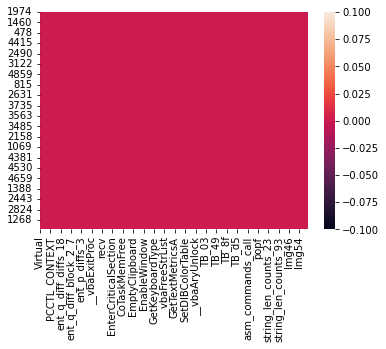

In [4]:
sns.heatmap(df.isnull())
# There are no null values in our dataset

## Splitting the dataset
Here we have processed our dataset into independent and dependent variables which are features(X) and target(y) and then splitted them for training and testing analysis.

In [5]:
X = df.iloc[:, 0:1803].values
y = df.iloc[:, [1804]].values
print(X.shape)
print(y.shape)

(4999, 1803)
(4999, 1)


In [6]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 10)

## Selecting the better classification model
Here the problem is to classify the different types of viruses. There are multiple classification models to classify the data which are:
* LOGISTIC REGRESSION - As we know logistic regression works more effectively when the classification problem is binary. But in our problem there are more than two types of viruses to classify, so classification using logistic regression would not be effective. Also from our less accuracy score we can see that the logistic classification did not work well on our data.

* SUPPORT VECTOR MACHINES - SVM model is more effective in high dimensional spaces. It is not suitable for large data sets and performs less when the data set has more noise. Also, as the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification. As our taks is to classify the data efficiently using this algorithm would be less effective and more time consuming. Again, the less accuracy score shows that the algorithm was not able to classifiy our data efficiently.

* K- NEAREST NEIGHBORS - KNN algorithm is easy to implement with less number of parameters but it does not work well with large datasets, high dimentional space and sensitive to noise in the dataset. Because of those issues, I found that KNN model got the lowest accuracy score of all the models.

* DECISION TREE - Decision treee classification model is a good model because of its robustness to noise, tolerance against missing information, low computational cost, and fast run time. But there are so many hyperparameters to be considered while building a decision tree otherwise there will be high chances of overfitting or underfitting the data. It was able to classify our data with pretty good accuracy score.

* RANDOM FOREST - Random forest is a collection of decision trees. It is also a good classification model as it is highly accurate and less prone to over fitting the data unlike decision trees which are prone to low bias and high variance. RFs perform better when dealing with a large number of features all we have to do is to use ensemble methods, feature selection/extraction to build good classification model. Because of it's better performance it was able to classify our dataset with better accuracy score and proved to be better than all other models for classifying our data.

#### Ensembling
Ensemble learning is an approach in which two or more models are fitted to the same data, and the predictions of each model are combined. By grouping the models we can easily judge which model performs better on our dataset. In my project I have tried to combine decision trees classifier, random forest classifier with bagging classifier to check which model performs better and found random forest classification worked better on my dataset with pretty good accuracy score.

#### Cross validation 
We have also used cross validation in our classification as it involves training the model using a subset of the data set and then evaluating it with the complementary subset of the data set. Through cross-validation we can estimate the model's performanace in a better way.


### Logistic Regression Classification

In [7]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred_lrc = lr_clf.predict(X_test)


In [8]:
print(classification_report(y_test, pred_lrc))
print(confusion_matrix(y_test, pred_lrc))
print(accuracy_score(y_test, pred_lrc))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67       210
           2       0.42      0.72      0.53       307
           3       0.54      0.99      0.70       420
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00       118
           7       0.00      0.00      0.00        64
           8       0.00      0.00      0.00       173
           9       0.00      0.00      0.00       135

    accuracy                           0.52      1500
   macro avg       0.18      0.26      0.21      1500
weighted avg       0.33      0.52      0.40      1500

[[140  35  35   0   0   0   0   0   0]
 [  2 222  83   0   0   0   0   0   0]
 [  1   4 415   0   0   0   0   0   0]
 [ 44   7  10   0   0   0   0   0   0]
 [  1   5   6   0   0   0   0   0   0]
 [  3  78  37   0   0   0   0   0   0]
 [  5  11  48   0   0   0   0   0   0]
 [ 11  68  94   0   0 

### SVM Classification

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

svm_m = modeling_pipeline = Pipeline([('scaling', StandardScaler()),
                                       ('model', SVC())])

param_grid = [
  {'model__C': [0.01, 0.1, 1, 10, 100, 1000], 'model__kernel': ['linear','rbf']}

 ]

svm_results = GridSearchCV(estimator=svm_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
svm_results = svm_results.fit(X_train, y_train)


In [10]:
print('\n Best params: ', svm_results.best_params_)


 Best params:  {'model__C': 10, 'model__kernel': 'rbf'}


In [11]:
svm_results.score(X_test, y_test)

0.6333333333333333

### KNN Classification

In [12]:
knn_m = modeling_pipeline = Pipeline([('scaling', StandardScaler()),
                                       ('model', KNeighborsClassifier())])


param_grid = [
  {'model__n_neighbors': [10, 15, 20, 30, 50], 'model__weights': ['uniform','distance']}
 ]

knn_results = GridSearchCV(estimator=knn_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
knn_results = knn_results.fit(X_train, y_train)


In [13]:
knn_results.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=50))])

In [14]:
knn_results.score(X_test, y_test)

0.366

### Decision tree Classification

In [15]:
clf = DecisionTreeClassifier(max_depth=5)

In [16]:
param_grid = [
  {'min_samples_leaf': [1, 5, 10, 20], 
   'max_depth': [5, 10, 15, 20, 35, 50], 
   'criterion': ['gini', 'entropy']},
 ]

dt_clf = GridSearchCV(clf, param_grid, cv=5)

In [17]:
dt_clf.fit(X_train, y_train)

dt_clf.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 10}

In [18]:
print('Test set score after CV: ', accuracy_score(y_test, dt_clf.predict(X_test)))

Test set score after CV:  0.856


### Random Forest Classification

In [19]:
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf_clf.fit(X_train, y_train)
print("accuracy:", accuracy_score(y_test, rf_clf.predict(X_test)))
print("\n feature importances:", rf_clf.feature_importances_)
print("\n sum of feature importances:", sum(rf_clf.feature_importances_) )
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

accuracy: 0.9006666666666666

 feature importances: [0.00036964 0.00012705 0.00027609 ... 0.0003521  0.0001375  0.00059902]

 sum of feature importances: 0.9999999999999981


In [20]:
### bagging

In [21]:
from sklearn.ensemble import BaggingClassifier
import time
classifiers = [ DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, criterion='gini'), 
               BaggingClassifier(DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, criterion='gini'), n_estimators=100, max_samples=0.5, oob_score=True) , 
               RandomForestClassifier(n_estimators=100, oob_score=True)]
names = ["DecisionTree", "Bagged Trees", "RandomForest"]
for model, m_name in zip(classifiers, names):
    t = time.process_time()
    model.fit(X_train, y_train)
    fit_time = time.process_time() - t
    
    print("\t", m_name, accuracy_score(y_test, model.predict(X_test)), "\ttime:", fit_time)
    if "oob_score_" in dir(model):
      print("\t\tOOB:", model.oob_score_)

	 DecisionTree 0.7806666666666666 	time: 1.46875
	 Bagged Trees 0.852 	time: 63.484375
		OOB: 0.8531008859674193
	 RandomForest 0.9026666666666666 	time: 8.96875
		OOB: 0.9051157473563876


#### Feature Selection
* Feature selection is the process of reducing the number of input variables (features). In this way we try to consider only the sub-set of most important features. 
* There are so many measures to select important features, in my analysis i have used mutual Information.
* *Mutual Information* measures how much information one variable gives about the other. In our case, we apply to input and target variables to determine how much information an input variable carries about the target variable.
* Also, In our dataset we are having a total of 1804 features through which we tried to classify our model and gained good accuracy score, but with the help of feature selection we are able to select the top 115 important features and were able to gain that good accuracy score. By considering only 115 features for the purpose of classification we are able to reduce the computational cost of model and achieve better performing model.
* First I have tried with the parameter of 100 as number of featured and got score of approximately 0.901 which is less than the accuracy score with 1804 features but not bad, then used 110 as the  parameter and received 0.902 which is nearly equal to the score of 1804 features then with the use of 120 featured my score started to decrease from which I can find that the range of most important featured lied between 110 and 120. So, considered 115 as my parameter and was able to achieve better score.
* we can also use pipeline and plots to get accurate parameters but it is consuming lot of time to get executed as the data is large, so adopted my model in this way. 

In [22]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
print(mutual_info)

[0.2173435  0.20925014 0.69176108 ... 0.01493154 0.         0.92211211]


In [23]:
from sklearn.feature_selection import GenericUnivariateSelect
mf_select = GenericUnivariateSelect(score_func=mutual_info_classif, mode="k_best", param=115)
mf_select.fit(X, y)    
X_mf = mf_select.transform(X)    #transforms the data to the selected feature space
print(X_mf.shape)

(4999, 115)


In [24]:
from sklearn.model_selection import cross_val_score
print("rf_clf MF k=115: ", cross_val_score(rf_clf, X_mf, y, cv=5).mean())

rf_clf MF k=115:  0.9009755755755755


In [25]:
importance = rf_clf.feature_importances_

Feature: 0, Score: 0.00037
Feature: 1, Score: 0.00013
Feature: 2, Score: 0.00028
Feature: 3, Score: 0.00024
Feature: 4, Score: 0.00069
Feature: 5, Score: 0.00129
Feature: 6, Score: 0.00019
Feature: 7, Score: 0.00025
Feature: 8, Score: 0.00017
Feature: 9, Score: 0.00216
Feature: 10, Score: 0.00006
Feature: 11, Score: 0.01025
Feature: 12, Score: 0.00037
Feature: 13, Score: 0.00279
Feature: 14, Score: 0.00080
Feature: 15, Score: 0.00067
Feature: 16, Score: 0.00045
Feature: 17, Score: 0.00042
Feature: 18, Score: 0.00136
Feature: 19, Score: 0.00215
Feature: 20, Score: 0.00313
Feature: 21, Score: 0.00055
Feature: 22, Score: 0.00246
Feature: 23, Score: 0.00079
Feature: 24, Score: 0.00159
Feature: 25, Score: 0.00098
Feature: 26, Score: 0.00046
Feature: 27, Score: 0.00053
Feature: 28, Score: 0.00194
Feature: 29, Score: 0.00033
Feature: 30, Score: 0.00081
Feature: 31, Score: 0.00158
Feature: 32, Score: 0.00422
Feature: 33, Score: 0.00119
Feature: 34, Score: 0.00110
Feature: 35, Score: 0.00219
Fe

Feature: 1691, Score: 0.00072
Feature: 1692, Score: 0.00058
Feature: 1693, Score: 0.00052
Feature: 1694, Score: 0.00046
Feature: 1695, Score: 0.00072
Feature: 1696, Score: 0.00711
Feature: 1697, Score: 0.00019
Feature: 1698, Score: 0.00012
Feature: 1699, Score: 0.00028
Feature: 1700, Score: 0.00030
Feature: 1701, Score: 0.00016
Feature: 1702, Score: 0.00015
Feature: 1703, Score: 0.00021
Feature: 1704, Score: 0.00029
Feature: 1705, Score: 0.00010
Feature: 1706, Score: 0.00016
Feature: 1707, Score: 0.00025
Feature: 1708, Score: 0.00023
Feature: 1709, Score: 0.00028
Feature: 1710, Score: 0.00017
Feature: 1711, Score: 0.00018
Feature: 1712, Score: 0.00047
Feature: 1713, Score: 0.00031
Feature: 1714, Score: 0.00032
Feature: 1715, Score: 0.00016
Feature: 1716, Score: 0.00027
Feature: 1717, Score: 0.00016
Feature: 1718, Score: 0.00026
Feature: 1719, Score: 0.00029
Feature: 1720, Score: 0.00036
Feature: 1721, Score: 0.00017
Feature: 1722, Score: 0.00028
Feature: 1723, Score: 0.00025
Feature: 1

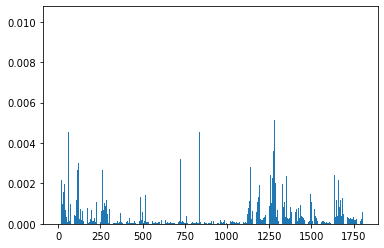

In [26]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plots feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Clustering
Clustering is the process of dividing the data points into a number of groups, such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.
In order to classify the virus types of our model, I have used Agglomerative clustering which is type of hierarchical clustering, that groups similar objects into groups called clusters. After receiving the output we can see that the virus types are clustered into 3 groups and the green class being more dominant which means that the computer is being attacked highly from those type of viruses, next being red group and then the orange group.

In [27]:
#Stolen with love from https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    #Make the coloring match up with the # of clusters
    kwargs['color_threshold'] = max(linkage_matrix[:,2]) - np.max(model.labels_)+1

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

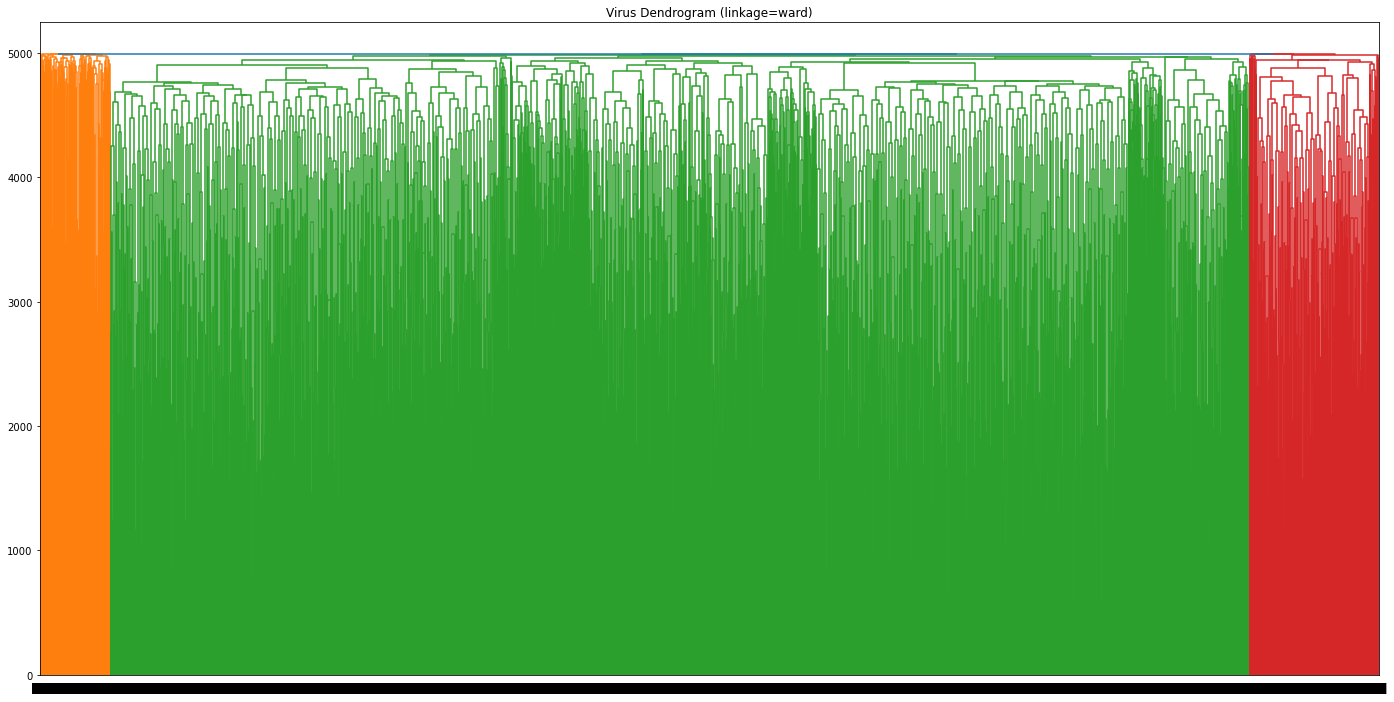

In [28]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, linkage="ward")

model = model.fit(X)
plt.figure(figsize=(12*2, 12))
plt.title('Virus Dendrogram (linkage=ward)')

plot_dendrogram(model, labels=y, leaf_font_size=12, leaf_rotation=0)
plt.show()